In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv("agaricus-lepiota.data.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


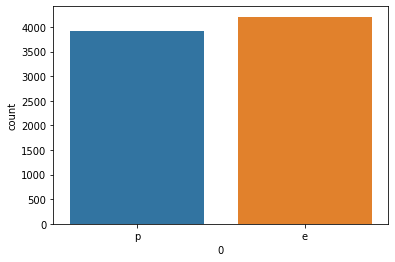

In [4]:
sns.countplot(x=df[0],data=df)

In [5]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [6]:
le = LabelEncoder()
df[0] = le.fit_transform(df[0])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
encoded_df = pd.get_dummies(df)
encoded_df.head()

,0,1_b,1_c,1_f,1_k,1_s,1_x,2_f,2_g,2_s,...,21_s,21_v,21_y,22_d,22_g,22_l,22_m,22_p,22_u,22_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [9]:
y = encoded_df[0]
X=encoded_df.drop(0, axis=1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [11]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
max_accuracy_score=0
for r_state in range(0,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30,random_state=r_state)
    logr = LogisticRegression()
    logr.fit(X_train,y_train)
    y_pred = logr.predict(X_test)
    accu_scr = accuracy_score(y_test,y_pred)
    if accu_scr>max_accuracy_score:
        max_accuracy_score = accu_scr
        final_r_state = r_state
    
print("max accuracy score corresponding to random state",final_r_state,"is",max_accuracy_score)

max accuracy score corresponding to random state 0 is 1.0


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30,random_state=0)

In [13]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predlr = lr.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predlr)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predlr)))
print("Classification Report\n{}".format(classification_report(y_test,predlr)))

Accuracy Score 1.0
Confusion Matrix 
[[1272    0]
 [   0 1166]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
neighbors = {"n_neighbors":range(1,7)}
knc = KNeighborsClassifier()
gknr = GridSearchCV(knc,neighbors,cv=10)
gknr.fit(X,y)
gknr.best_params_

{'n_neighbors': 2}

In [15]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
predknn = knn.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predknn)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predknn)))
print("Classification Report\n{}".format(classification_report(y_test,predknn)))

Accuracy Score 1.0
Confusion Matrix 
[[1272    0]
 [   0 1166]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [26]:
from sklearn.model_selection import cross_val_score
a_score = cross_val_score(LogisticRegression(),X,y,cv=5,scoring="accuracy")
a_score

array([0.94830769, 1.        , 0.98830769, 1.        , 0.66009852])

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predgnb = gnb.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predgnb)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predgnb)))
print("Classification Report\n{}".format(classification_report(y_test,predgnb)))

Accuracy Score 0.963084495488105
Confusion Matrix 
[[1183   89]
 [   1 1165]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1272
           1       0.93      1.00      0.96      1166

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.97      0.96      0.96      2438



In [28]:
from sklearn.naive_bayes import MultinomialNB
pnb = MultinomialNB()
pnb.fit(X_train,y_train)
predpnb = pnb.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predpnb)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predpnb)))
print("Classification Report\n{}".format(classification_report(y_test,predpnb)))

Accuracy Score 0.9634946677604594
Confusion Matrix 
[[1270    2]
 [  87 1079]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1272
           1       1.00      0.93      0.96      1166

    accuracy                           0.96      2438
   macro avg       0.97      0.96      0.96      2438
weighted avg       0.97      0.96      0.96      2438



In [29]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=10)
svc.fit(X_train,y_train)
predsvc = svc.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predsvc)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predsvc)))
print("Classification Report\n{}".format(classification_report(y_test,predsvc)))

Accuracy Score 1.0
Confusion Matrix 
[[1272    0]
 [   0 1166]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [30]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=100)
svc.fit(X_train,y_train)
predsvc = svc.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predsvc)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predsvc)))
print("Classification Report\n{}".format(classification_report(y_test,predsvc)))

Accuracy Score 1.0
Confusion Matrix 
[[1272    0]
 [   0 1166]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [31]:
from sklearn.svm import SVC
svc = SVC(kernel='poly',C=100)
svc.fit(X_train,y_train)
predsvc = svc.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predsvc)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predsvc)))
print("Classification Report\n{}".format(classification_report(y_test,predsvc)))

Accuracy Score 1.0
Confusion Matrix 
[[1272    0]
 [   0 1166]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',random_state=134)
dtc.fit(X_train, y_train)
y_pred1 = dtc.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred1)))
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test,y_pred1)))
print("Classification Report: \n{}".format(classification_report(y_test,y_pred1)))

Accuracy Score 1.0
Confusion Matrix: 
[[1272    0]
 [   0 1166]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500,random_state = 134)
rfc.fit(X_train,y_train)
predrf = rfc.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predrf)))
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test,predrf)))
print("Classification Report: \n{}".format(classification_report(y_test,predrf)))

Accuracy Score 1.0
Confusion Matrix: 
[[1272    0]
 [   0 1166]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [34]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
predabc = abc.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predabc)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predabc)))
print("Classification Report{}".format(classification_report(y_test,predabc)))

Accuracy Score 1.0
Confusion Matrix 
[[1272    0]
 [   0 1166]]
Classification Report              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [35]:
svc=SVC(kernel='linear',C=100)
ad = AdaBoostClassifier(n_estimators=100,base_estimator=svc,algorithm='SAMME')
ad.fit(X_train,y_train)
predad = ad.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predad)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predad)))
print("Classification Report\n{}".format(classification_report(y_test,predad)))

Accuracy Score 1.0
Confusion Matrix 
[[1272    0]
 [   0 1166]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 240,random_state=134)
gbc.fit(X_train,y_train)
predgb = gbc.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predgb)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predgb)))
print("Classification Report{}".format(classification_report(y_test,predgb)))

Accuracy Score 1.0
Confusion Matrix 
[[1272    0]
 [   0 1166]]
Classification Report              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [38]:
import xgboost as xgb
xg = xgb.XGBClassifier(random_state=134)
xg.fit(X_train, y_train)
predxg = xg.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,predxg)))
print("Confusion Matrix \n{}".format(confusion_matrix(y_test,predxg)))
print("Classification Report{}".format(classification_report(y_test,predxg)))

Accuracy Score 1.0
Confusion Matrix 
[[1272    0]
 [   0 1166]]
Classification Report              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [39]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X)

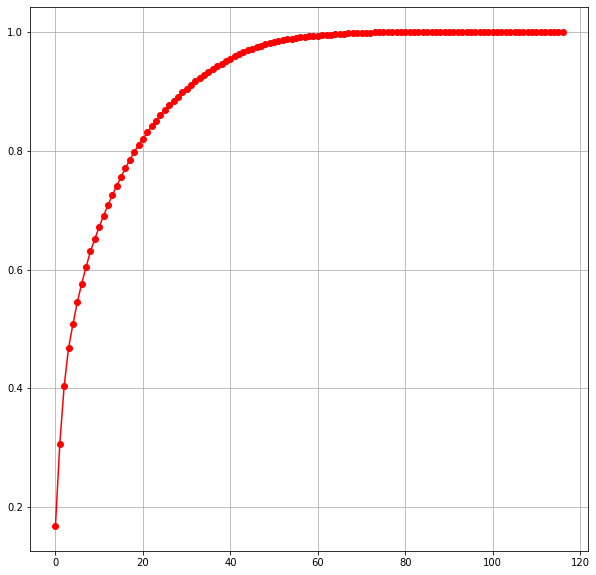

In [40]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [41]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(X)
print(x_new)

[[-0.9962452  -0.94689159  0.80249237 ... -0.20257996  0.62847022
   0.90748485]
 [-1.44173281 -0.16415416  1.0681752  ... -0.22772302  0.14564079
   0.16247718]
 [-1.52408476 -0.40874595  0.85317185 ...  0.29890974  0.5084889
   0.00921397]
 ...
 [-0.28781672 -0.32621374  0.27466379 ...  0.03105176  1.35815363
   1.78095574]
 [ 1.93043304 -1.57316307 -0.11574972 ...  0.23917796 -0.47254656
   0.35766159]
 [-0.2492972  -0.31229215  0.36186784 ... -1.22438744  1.0700195
   1.75762677]]


In [42]:
from sklearn.externals import joblib
joblib.dump(lr,'Mushrooms_clf.pkl')

['Mushrooms_clf.pkl']